In [315]:
import numpy as np
import pandas as pd

In [316]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [317]:
df.shape

(5572, 5)

# **Flow of this Project:**
1) Data Cleaning
2) EDA
3) Text Preprocessing
4) Model Building
5) Evaluation
6) Improvements
7) Website
8) Deployment

# **1) Data Cleaning**

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [319]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [320]:
df['Unnamed: 2'].isnull().value_counts()

,count
Unnamed: 2,
True,5522
False,50


In [321]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [322]:
df.columns=['target','message']

In [323]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [324]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [325]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [326]:
df.duplicated().value_counts()

,count
False,5169
True,403


In [327]:
df.drop_duplicates(inplace=True)

In [328]:
df.duplicated().value_counts()

,count
False,5169


In [329]:
df.shape

(5169, 2)

# **2) EDA**

In [330]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [331]:
df['target'].value_counts()

,count
target,
0,4516
1,653


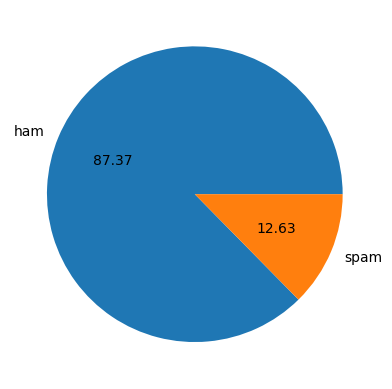

In [332]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

this shows that data is imbalanced

In [333]:
import nltk

In [334]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [335]:
from nltk import word_tokenize , sent_tokenize

In [336]:
df['message'].apply(len) # number of characters in each message

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [337]:
df['num_characters']=df['message'].apply(len)

In [338]:
df

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [339]:
# option 1
for msg in df['message']:
  print(word_tokenize(msg))

Streaming output truncated to the last 5000 lines.
['Hmmm', '..', 'Thk', 'sure', 'got', 'time', 'to', 'hop', 'ard', '...', 'Ya', ',', 'can', 'go', '4', 'free', 'abt', '...', 'Muz', 'call', 'u', 'to', 'discuss', 'liao', '...']
['What', 'time', 'you', 'coming', 'down', 'later', '?']
['Bloody', 'hell', ',', 'cant', 'believe', 'you', 'forgot', 'my', 'surname', 'Mr', '.', 'Ill', 'give', 'u', 'a', 'clue', ',', 'its', 'spanish', 'and', 'begins', 'with', 'm', '...']
['Well', ',', 'i', "'m", 'gon', 'na', 'finish', 'my', 'bath', 'now', '.', 'Have', 'a', 'good', '...', 'fine', 'night', '.']
['Let', 'me', 'know', 'when', 'you', "'ve", 'got', 'the', 'money', 'so', 'carlos', 'can', 'make', 'the', 'call']
['U', 'still', 'going', 'to', 'the', 'mall', '?']
['Turns', 'out', 'my', 'friends', 'are', 'staying', 'for', 'the', 'whole', 'show', 'and', 'wo', "n't", 'be', 'back', 'til', '~', '&', 'lt', ';', '#', '&', 'gt', ';', ',', 'so', 'feel', 'free', 'to', 'go', 'ahead', 'and', 'smoke', 'that', '$', '&', 'l

In [340]:
# option 2
df['message'].apply(lambda x : word_tokenize(x))

,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [341]:
df['message'].apply(lambda x: len(word_tokenize(x)))

,message
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [342]:
df['num_words']=df['message'].apply(lambda x: len(word_tokenize(x)))

In [343]:
df

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [344]:
df['message'].apply(lambda x: sent_tokenize(x))

,message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will Ì_ b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [345]:
df['message'].apply(lambda x: len(sent_tokenize(x)))

,message
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [346]:
df['num_sent']=df['message'].apply(lambda x: len(sent_tokenize(x)))

In [347]:
df

,target,message,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [348]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [349]:
df[df['target'] == 0]

,target,message,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [350]:
# only ham rows description
df[df['target'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [351]:
# only for spam description
df[df['target'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [352]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

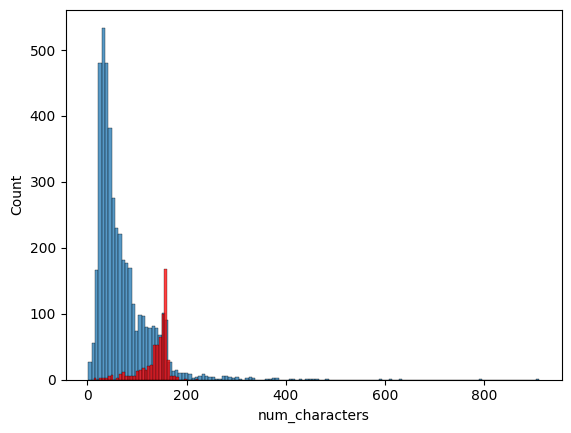

In [353]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
# we write ['num_characters'] and not [['num_characters']] because histplot expects a series of data that is 1D array, and not a dataframe which 2D as then histplot does'nt know which column to plot

<Axes: xlabel='num_words', ylabel='Count'>

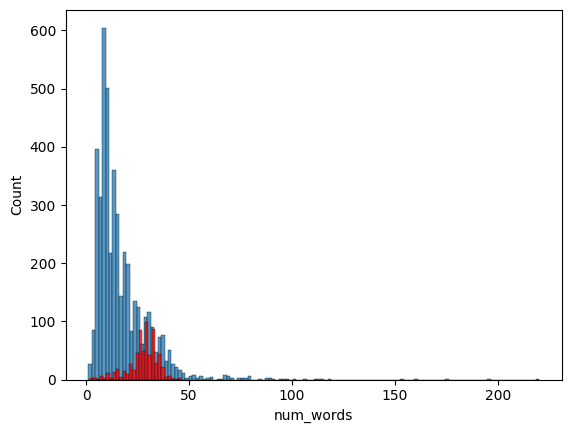

In [354]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

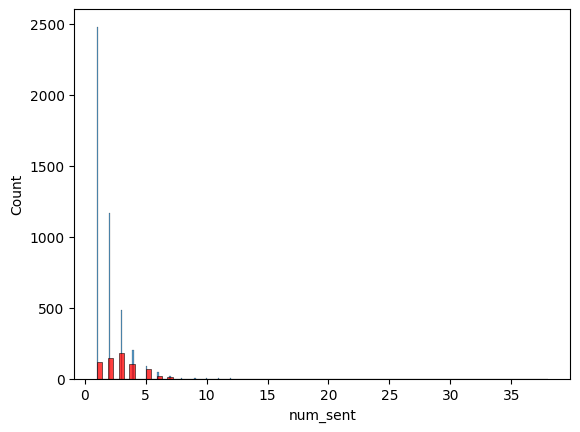

In [355]:
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

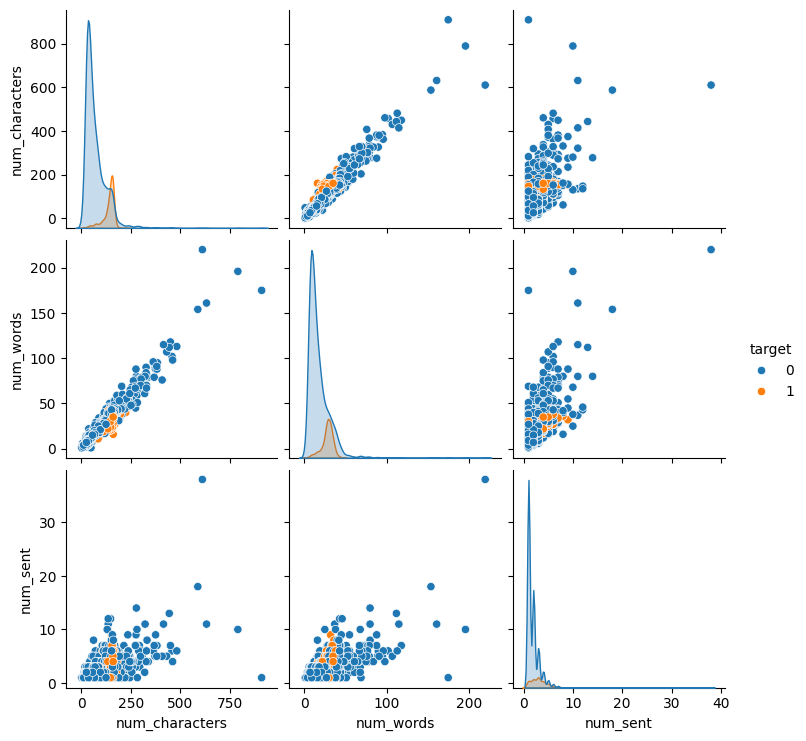

In [356]:
sns.pairplot(df,hue='target')

In [357]:
df[['target', 'num_characters','num_words','num_sent']].corr()

,target,num_characters,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

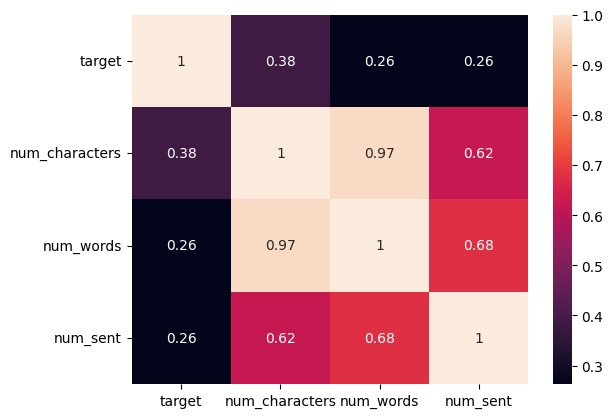

In [358]:
sns.heatmap(df[['target', 'num_characters','num_words','num_sent']].corr(),annot=True)

among the 3 columns, we will consider num_characters column because it is most related to target column , also only 1 column because these 3 columns are highly correlated to each other.

# **3) Data Preprocessing**

In [359]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [360]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [361]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [362]:
def data_preprocessing(text):
  text=text.lower()
  words=word_tokenize(text)
  cleaned_words=[ps.stem(word) for word in words if word.isalnum() and word not in set(stopwords.words('english'))]
  return " ".join(cleaned_words)

In [363]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [364]:
data_preprocessing(df['message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [365]:
df['processed_message']=df['message'].apply(data_preprocessing)

In [366]:
df

,target,message,num_characters,num_words,num_sent,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# **Word Cloud**
A WordCloud is a visual representation of text data —
it shows the most frequent words in your dataset, where:

Larger words → appear more frequently

Smaller words → appear less frequently

In [367]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target'] == 1]['processed_message'].str.cat(sep=" "))

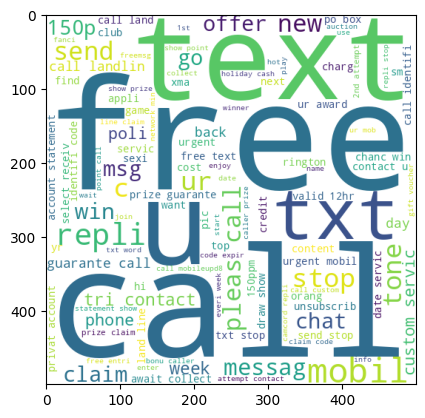

In [368]:
plt.imshow(spam_wc)

In [369]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc=wc.generate(df[df['target'] == 0]['processed_message'].str.cat(sep=" "))

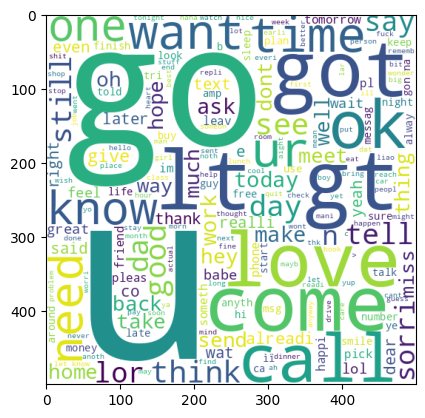

In [370]:
plt.imshow(ham_wc)

# **finding most frequent words in spam message**

In [371]:
frequent_words=[]
for msg in df[df['target']==1]['processed_message']:
  for word in word_tokenize(msg):
    frequent_words.append(word)
frequent_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [372]:
len(frequent_words)

9939

In [373]:
from collections import Counter
Counter(frequent_words)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [374]:
from collections import Counter
Counter(frequent_words).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [375]:
pd.DataFrame(Counter(frequent_words).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/tmp/ipython-input-3733770142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(frequent_words).most_common(30))[0],y=pd.DataFrame(Counter(frequent_words).most_common(30))[1],palette='viridis')


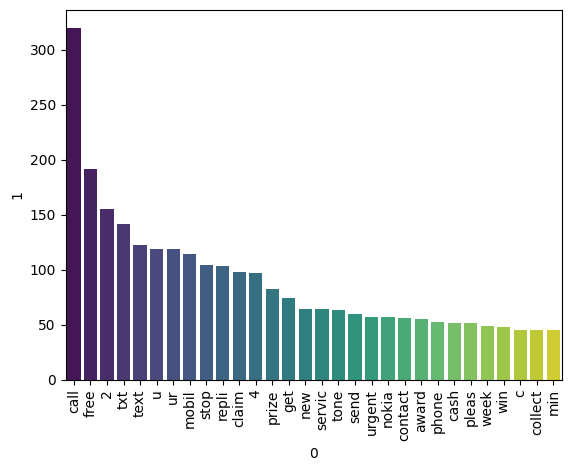

In [376]:
sns.barplot(x=pd.DataFrame(Counter(frequent_words).most_common(30))[0],y=pd.DataFrame(Counter(frequent_words).most_common(30))[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

# **4) Model Building**

In [450]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

using bow

In [451]:
X=cv.fit_transform(df['processed_message']).toarray()

In [452]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [453]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [454]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [455]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [456]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [457]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [458]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [459]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


using tf-idf

In [460]:
X=tfidf.fit_transform(df['processed_message']).toarray()

In [461]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [462]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [463]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [464]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [465]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [466]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [467]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


***In email/sms spam classifier, precission matters a lot, more than accuracy , therefore considering mnb as it has highest precision***

In [468]:
# testing other algos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [469]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) # more random than random forest therefore sometimes gives better results than rf
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [470]:

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [471]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [472]:
accuracy,precision=train_classifier(svc,X_train,y_train,X_test,y_test)
print(accuracy)
print(precision)

0.9758220502901354
0.9477611940298507


In [473]:
for name,clf in clfs.items():
  print(name)

SVC
KN
NB
DT
LR
RF
AdaBoost
BgC
ETC
GBDT
xgb


In [474]:
for name,clf in clfs.items():
  print(clf)

SVC(gamma=1.0, kernel='sigmoid')
KNeighborsClassifier()
MultinomialNB()
DecisionTreeClassifier(max_depth=5)
LogisticRegression(penalty='l1', solver='liblinear')
RandomForestClassifier(n_estimators=50, random_state=2)
AdaBoostClassifier(random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(n_estimators=50, random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=N

In [475]:
accuracy_list=[]
precision_list=[]

for name,clf in clfs.items():
  print(f'working with {name}')
  accuracy,precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  accuracy_list.append(accuracy)
  precision_list.append(precision)

working with SVC
working with KN
working with NB
working with DT
working with LR
working with RF
working with AdaBoost
working with BgC
working with ETC
working with GBDT
working with xgb


In [476]:
accuracy_list

[0.9758220502901354,
 0.90715667311412,
 0.9729206963249516,
 0.9313346228239845,
 0.9468085106382979,
 0.971953578336557,
 0.913926499032882,
 0.960348162475822,
 0.9796905222437138,
 0.9497098646034816,
 0.9680851063829787]

In [477]:
precision_list

[0.9477611940298507,
 1.0,
 0.9915966386554622,
 0.8135593220338984,
 0.8629032258064516,
 0.9915254237288136,
 0.7916666666666666,
 0.8768115942028986,
 1.0,
 0.9514563106796117,
 0.9375]

In [478]:
data=pd.DataFrame(accuracy_list,columns=['Accuracy'])
data

,Accuracy
0,0.975822
1,0.907157
2,0.972921
3,0.931335
4,0.946809
5,0.971954
6,0.913926
7,0.960348
8,0.979691
9,0.949710


In [479]:
data['Precision']=pd.DataFrame(precision_list)
data

,Accuracy,Precision
0,0.975822,0.947761
1,0.907157,1.000000
2,0.972921,0.991597
3,0.931335,0.813559
4,0.946809,0.862903
5,0.971954,0.991525
6,0.913926,0.791667
7,0.960348,0.876812
8,0.979691,1.000000
9,0.949710,0.951456


In [480]:
data['Algorithm']=pd.DataFrame(clfs.keys())
data

,Accuracy,Precision,Algorithm
0,0.975822,0.947761,SVC
1,0.907157,1.000000,KN
2,0.972921,0.991597,NB
3,0.931335,0.813559,DT
4,0.946809,0.862903,LR
5,0.971954,0.991525,RF
6,0.913926,0.791667,AdaBoost
7,0.960348,0.876812,BgC
8,0.979691,1.000000,ETC
9,0.949710,0.951456,GBDT


In [481]:
data.sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Algorithm
8,0.979691,1.000000,ETC
0,0.975822,0.947761,SVC
2,0.972921,0.991597,NB
5,0.971954,0.991525,RF
10,0.968085,0.937500,xgb
7,0.960348,0.876812,BgC
9,0.949710,0.951456,GBDT
4,0.946809,0.862903,LR
3,0.931335,0.813559,DT
6,0.913926,0.791667,AdaBoost


In [482]:
data.sort_values(by='Precision',ascending=False)

,Accuracy,Precision,Algorithm
1,0.907157,1.000000,KN
8,0.979691,1.000000,ETC
2,0.972921,0.991597,NB
5,0.971954,0.991525,RF
9,0.949710,0.951456,GBDT
0,0.975822,0.947761,SVC
10,0.968085,0.937500,xgb
7,0.960348,0.876812,BgC
4,0.946809,0.862903,LR
3,0.931335,0.813559,DT


In [483]:
data=pd.melt(data,id_vars=['Algorithm'])
data
"""
What pd.melt Does

 Wide format: Each column represents a different variable.

Long format: You convert it so that there’s one column for variable names and another for values.
"""

'\nWhat pd.melt Does\n\n Wide format: Each column represents a different variable.\n\nLong format: You convert it so that there’s one column for variable names and another for values.\n'

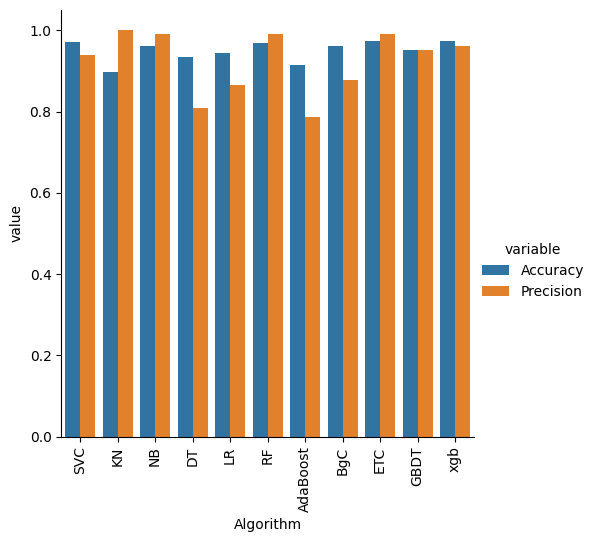

In [449]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=data,kind='bar')
plt.xticks(rotation='vertical')
plt.show()

# **Trying Voting Classifier**
using top 3 best models

In [484]:
from sklearn.ensemble import VotingClassifier
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()

In [485]:
estimators=[
    ('ExtraTreesClassifier',etc),
    ('RandomForestClassifier',rfc),
    ('MultinomialNB',mnb)
]

In [486]:
voting=VotingClassifier(estimators=estimators,voting='soft')

In [487]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('ExtraTreesClassifier',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('MultinomialNB', MultinomialNB())],
                 voting='soft')

In [488]:
y_pred=voting.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.97678916827853
1.0


# **Trying Stacking**

In [500]:
estimators=[
    ('ExtraTreesClassifier',etc),
    ('RandomForestClassifier',rfc),
    ('MultinomialNB',mnb)
]
final_estimator=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [501]:
from sklearn.ensemble import StackingClassifier
stacking=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [502]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('ExtraTreesClassifier',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('MultinomialNB', MultinomialNB())],
                   final_estimator=GradientBoostingClassifier(n_estimators=50,
                                                              random_state=2))

In [503]:
stacking.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.97678916827853
1.0


# ***choosing voting model as out final model***

In [504]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))